# Mall Data Cluster Analysis

### Agenda

1.	EDA 
2.	Visualisation with proper explanation
3.	Bucket the data into appropriate clusters and give a meaning full Name to each clusters (try various algorithms).


##### Attributes Description
* ID: unique customer ID 
* V1,V2,V3,V4,V5,V6: (int)
* Income: income of each unique customer(float)
* Mall Visits: Number of visits (int)

In [313]:
#Import required packages
import pandas as pd
import numpy as np
import os

### Understanding Data

In [314]:
pwd

'D:\\vu\\terms\\term 8\\Methods and Algorithm in ML- 1\\Assignments'

In [315]:
os.chdir('D:\\vu\\terms\\term 8\\Methods and Algorithm in ML- 1\\Assignments')

In [316]:
#Reading the data
mall_data = pd.read_csv("mall_data.csv")
mall_data.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1,6,4,7,3,2,3,60000.0,3
1,2,2,3,1,4,5,4,30000.0,1
2,3,7,2,6,4,1,3,70000.0,3
3,4,4,6,4,5,3,6,30000.0,7
4,5,1,3,2,2,6,4,60000.0,1


In [317]:
mall_data.tail()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
3035,2082,3,7,2,5,3,3,31385.787726,6
3036,705,4,6,3,5,2,6,28864.829550,5
3037,1359,4,6,3,6,2,5,32411.941738,6
3038,764,3,5,3,5,4,5,29304.967254,7
3039,2904,3,5,3,6,4,6,22344.644703,7


In [318]:
#Dimensions of the data
mall_data.shape

(3040, 9)

In [319]:
# Data type of each attribute
mall_data.dtypes

ID               int64
V1               int64
V2               int64
V3               int64
V4               int64
V5               int64
V6               int64
Income         float64
Mall.Visits      int64
dtype: object

In [320]:
#Summary statistics
mall_data.describe()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.00000,3040.000000,3040.000000
mean,1520.500000,3.511184,4.153618,3.498684,4.190132,3.514803,4.03750,44326.949077,3.293092
std,877.716735,1.838639,1.604664,1.745015,1.579953,1.749661,1.36589,17061.017357,1.972320
min,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.00000,470.051848,0.000000
25%,760.750000,2.000000,3.000000,2.000000,3.000000,2.000000,3.00000,30613.749831,2.000000
50%,1520.500000,3.000000,4.000000,3.000000,4.000000,3.000000,4.00000,41515.891985,3.000000
75%,2280.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,57887.934429,5.000000
max,3040.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,94272.509094,7.000000


In [321]:
mall_data['Mall.Visits'].value_counts()

2    587
4    570
3    569
0    287
6    271
1    259
5    257
7    240
Name: Mall.Visits, dtype: int64

#### Choose required features

In [322]:
mall_data_id = mall_data['ID']

mall_data.drop('ID', axis=1, inplace=True)
mall_data.head(3)

,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,6,4,7,3,2,3,60000.0,3
1,2,3,1,4,5,4,30000.0,1
2,7,2,6,4,1,3,70000.0,3


The attribute ID is dropped because no additional information is being added by it.

In [323]:
print(mall_data.shape)
print(mall_data_id.shape)

(3040, 8)
(3040,)


#### Missing value analysis

In [324]:
mall_data.isnull().sum(axis=0)

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
Income         0
Mall.Visits    0
dtype: int64

### Data Visualization

All the attributes are numeric.

In [325]:
import matplotlib.pyplot as plt

In [326]:
V1_Count= mall_data['V1'].value_counts()
V2_Count= mall_data['V2'].value_counts()
V3_Count= mall_data['V3'].value_counts()
V4_Count= mall_data['V4'].value_counts()
V5_Count= mall_data['V5'].value_counts()
V6_Count= mall_data['V6'].value_counts()

print(V1_Count) 
print(V2_Count)
print(V3_Count)
print(V4_Count)
print(V5_Count)
print(V6_Count)

4    698
3    544
1    521
2    491
7    283
5    252
6    251
Name: V1, dtype: int64
3    605
4    605
2    590
5    556
6    356
7    328
Name: V2, dtype: int64
2    679
3    671
4    578
1    342
6    261
5    259
7    250
Name: V3, dtype: int64
4    618
5    609
3    590
2    552
6    350
7    321
Name: V4, dtype: int64
3    688
2    674
4    561
1    334
6    274
5    256
7    253
Name: V5, dtype: int64
4    857
3    840
5    561
2    350
7    229
6    203
Name: V6, dtype: int64


The counts of each value for the unique customers.
Most of the attributes have highest count for the value 4, and become lesser for higher values.

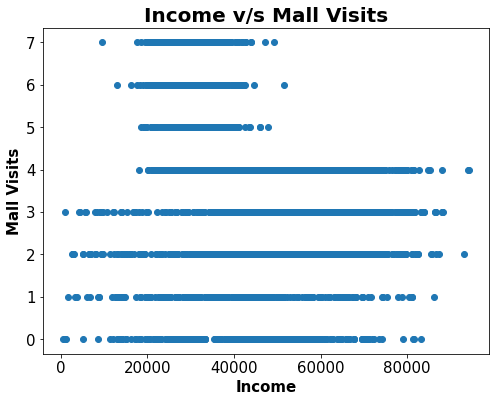

In [327]:
# Scatter pLot- Income v/s Mall Visits
plt.figure(figsize=(8,6))
plt.scatter(mall_data.Income, mall_data["Mall.Visits"])
plt.title('Income v/s Mall Visits',fontsize=20, weight="bold")
plt.xlabel('Income',fontsize=15, weight="bold")
plt.ylabel('Mall Visits',fontsize=15, weight="bold")
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

People belonging to income range between 15,000-50,000 units have the highest mall visits.

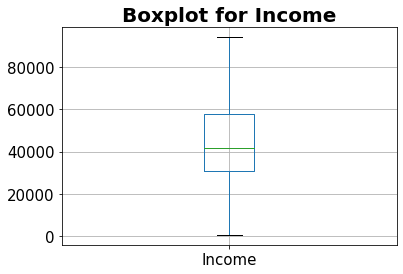

In [328]:
# Income box plot
plt.figure(figsize=(6,4))
mall_data.boxplot('Income',figsize=(10,5))
plt.title('Boxplot for Income',fontsize=20, weight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

On an average people visiting the mall have an income of 41,000 units.
There are no outliers for income in the data.

#### Data Standardization

In [329]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(mall_data)
mall_std = pd.DataFrame(standardizer.transform(mall_data))
mall_std.head()

,0,1,2,3,4,5,6,7
0,1.353841,-0.095748,2.006797,-0.753394,-0.865912,-0.759703,0.918798,-0.148627
1,-0.822039,-0.719034,-1.432134,-0.120360,0.848988,-0.027459,-0.839886,-1.162828
2,1.897812,-1.342320,1.433642,-0.120360,-1.437545,-0.759703,1.505026,-0.148627
3,0.265901,1.150824,0.287332,0.512675,-0.294278,1.437029,-0.839886,1.879775
4,-1.366009,-0.719034,-0.858979,-1.386429,1.420621,-0.027459,0.918798,-1.162828


In [330]:
mall_std.describe()

,0,1,2,3,4,5,6,7
count,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03
mean,7.267797e-15,4.492532e-15,-2.277418e-16,1.481856e-15,-1.086046e-15,8.122158e-17,5.002577e-16,-1.125708e-15
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00
min,-1.366009e+00,-1.342320e+00,-1.432134e+00,-1.386429e+00,-1.437545e+00,-1.491947e+00,-2.571014e+00,-1.669928e+00
25%,-8.220391e-01,-7.190343e-01,-8.589785e-01,-7.533944e-01,-8.659116e-01,-7.597031e-01,-8.039061e-01,-6.557276e-01
50%,-2.780689e-01,-9.574822e-02,-2.858234e-01,-1.203599e-01,-2.942783e-01,-2.745915e-02,-1.647920e-01,-1.486271e-01
75%,8.098713e-01,5.275378e-01,8.604868e-01,5.126747e-01,8.489882e-01,7.047848e-01,7.949829e-01,8.655737e-01
max,1.897812e+00,1.774110e+00,2.006797e+00,1.778744e+00,1.992255e+00,2.169273e+00,2.927948e+00,1.879775e+00


In [331]:
mall_std.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

### Agglomerative Clustering

In [332]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

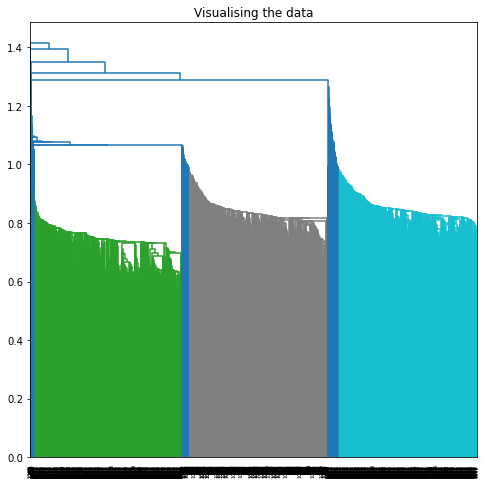

In [333]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram(shc.linkage(mall_std, method ='single'))
plt.show(True)

The method single uses minimum distance between two points as definition of proximity. 

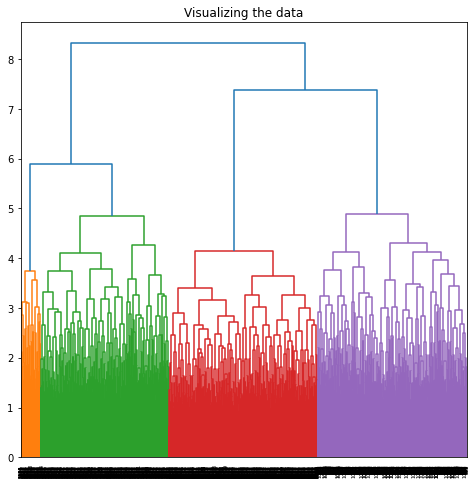

In [334]:
plt.figure(figsize= (8,8))
plt.title('Visualizing the data')
Dendogram= shc.dendrogram(shc.linkage(mall_std, method='complete'))
plt.show(True)

The method single uses maximum distance between two points as definition of proximity.

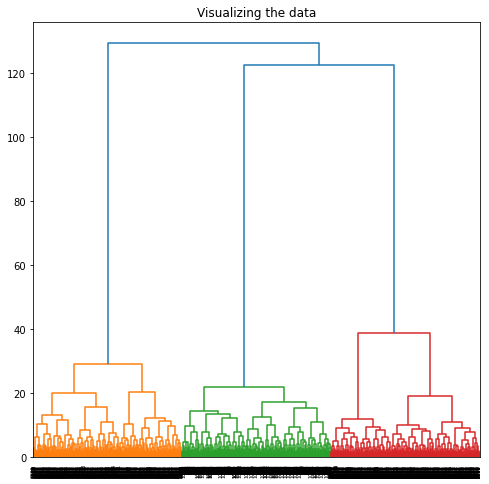

In [335]:
plt.figure(figsize= (8,8))
plt.title('Visualizing the data')
Dendogram= shc.dendrogram(shc.linkage(mall_std, method='ward'))
plt.show(True)

The proximity of 2 clusters is defined as increase in the squared error when two clusters are merged.

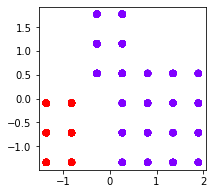

In [336]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(3, 3))
plt.scatter(mall_std.iloc[:,0], mall_std.iloc[:,1], 
           c = ac2.fit_predict(mall_std), cmap ='rainbow')
plt.show()

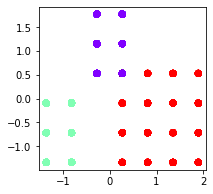

In [337]:
ac2 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(3, 3))
plt.scatter(mall_std.iloc[:,0], mall_std.iloc[:,1], 
           c = ac2.fit_predict(mall_std), cmap ='rainbow')
plt.show()

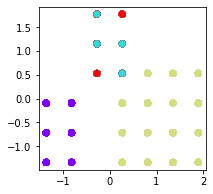

In [338]:
ac2 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(3, 3))
plt.scatter(mall_std.iloc[:,0], mall_std.iloc[:,1], 
           c = ac2.fit_predict(mall_std), cmap ='rainbow')
plt.show()

The ward method clearly shows 3 well defined clusters, which is further seen in the visualizations.

### K-Means Clustering

In [339]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters= 3, random_state= 2215)
kmeans_object.fit(mall_std)

kmeans_clusters = kmeans_object.labels_

In [340]:
kmeans_clusters

array([1, 0, 1, ..., 2, 2, 2])

In [341]:
np.unique(kmeans_clusters, return_counts=True)

(array([0, 1, 2]), array([1012, 1016, 1012], dtype=int64))

In [342]:
kmeans_results = pd.DataFrame({"label":mall_data_id,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,1,1
1,2,0
2,3,1
3,4,2
4,5,0


Assigning each point (unique ID) to a cluster.

In [343]:
kmeans_results[kmeans_results.kmeans_cluster ==0]

,label,kmeans_cluster
1,2,0
4,5,0
8,9,0
10,11,0
12,13,0
...,...,...
2035,962,0
2036,2335,0
2037,2293,0
2038,145,0


People belonging to cluster 0.

#### Inspecting cluster centroids to understand average statistics of each cluster

In [344]:
## Using inverse_transform to retrive actual values from standardized data
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),
                                 columns=mall_data.columns)   
cluster_centroids

,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1.485178,2.993083,1.986166,3.568182,5.544466,2.986166,41907.792598,1.398221
1,5.577756,3.470472,5.506890,3.026575,2.007874,4.034449,60019.482421,2.981299
2,3.462451,6.000000,2.995059,5.980237,2.998024,5.091897,30991.546389,5.500988


In [345]:
cluster_centroids.to_csv("best_kmeans_cluster_centroids2.csv")

#### Chosing optimal (k) clusters.

In [346]:
import warnings
warnings.filterwarnings('ignore') 

wss= {}
for k in range(2, 11):
    kmeans_loop = KMeans(n_clusters=k, n_init=30, max_iter=300, random_state=1000).fit(mall_std)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


In [347]:
wss

{2: 15935.952304192595,
 3: 8419.088479678836,
 4: 7582.470827359389,
 5: 6937.2243312806595,
 6: 6558.0681976655305,
 7: 6317.1271619531135,
 8: 6136.206068131288,
 9: 5954.877935678906,
 10: 5798.666662388226}

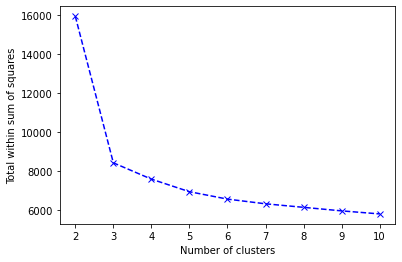

In [348]:
%matplotlib inline
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

According to the plot we can take 3 to 4 as our k.
Silhouette Analysis will further help to pick the best k.

### Silhouette Analysis
**Higher the silhouette score better the clustering**

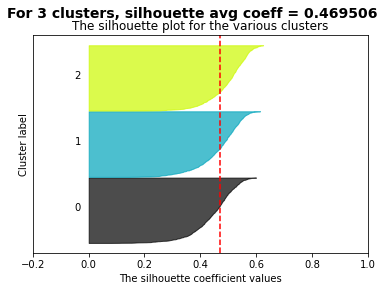

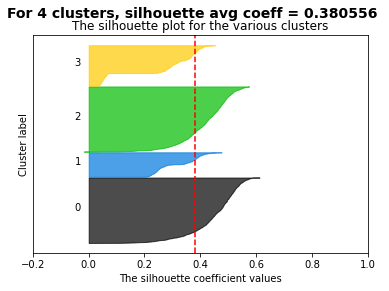

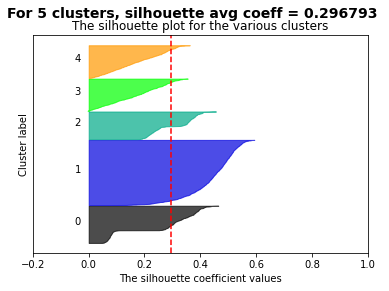

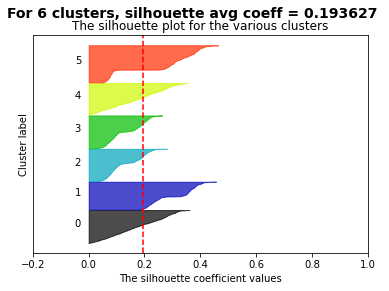

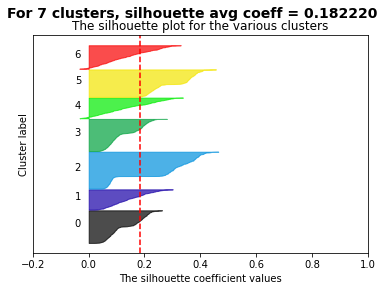

In [349]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = mall_std.values

range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()

    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

Cluster 3 has the highest silhouette score and therefore is the best k value for this dataset.

In [350]:
best_kmeans = KMeans(n_clusters=3, random_state=2215)
best_kmeans.fit(mall_std)
best_kmeans_labels = best_kmeans.labels_

In [351]:
kmeans_results = pd.DataFrame({"label":mall_data_id,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,1,1
1,2,0
2,3,1
3,4,2
4,5,0


In [352]:
kmeans_results[kmeans_results.kmeans_cluster == 2]

,label,kmeans_cluster
3,4,2
9,10,2
13,14,2
15,16,2
17,18,2
...,...,...
3035,2082,2
3036,705,2
3037,1359,2
3038,764,2


In [353]:
kmeans_results.kmeans_cluster.value_counts()

1    1016
2    1012
0    1012
Name: kmeans_cluster, dtype: int64

Count of how many records belong to each cluster.

### Add Cluster Labels to Original Data

In [354]:
mall_data = pd.read_csv("mall_data.csv")
mall_data['label'] = mall_data['ID']
mall_data.drop('ID', axis=1, inplace=True)

final_cluster_data = pd.merge(mall_data, kmeans_results, on='label')
final_cluster_data.head(10)


,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label,kmeans_cluster
0,6,4,7,3,2,3,60000.0,3,1,1
1,2,3,1,4,5,4,30000.0,1,2,0
2,7,2,6,4,1,3,70000.0,3,3,1
3,4,6,4,5,3,6,30000.0,7,4,2
4,1,3,2,2,6,4,60000.0,1,5,0
5,6,4,6,3,3,4,50000.0,2,6,1
6,5,3,6,3,3,4,65000.0,3,7,1
7,7,3,7,4,1,4,55000.0,4,8,1
8,2,4,3,3,6,3,70000.0,0,9,0
9,3,5,3,6,4,6,25000.0,6,10,2


In [355]:
final_cluster_data[final_cluster_data.kmeans_cluster ==2]

,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label,kmeans_cluster
3,4,6,4,5,3,6,30000.000000,7,4,2
9,3,5,3,6,4,6,25000.000000,6,10,2
13,4,6,4,6,4,7,35000.000000,5,14,2
15,3,5,4,6,4,7,40000.000000,4,16,2
17,3,7,2,6,4,3,25000.000000,5,18,2
...,...,...,...,...,...,...,...,...,...,...
3035,3,7,2,5,3,3,31385.787726,6,2082,2
3036,4,6,3,5,2,6,28864.829550,5,705,2
3037,4,6,3,6,2,5,32411.941738,6,1359,2
3038,3,5,3,5,4,5,29304.967254,7,764,2


In [356]:
final_cluster_data.shape

(3040, 10)

In [357]:
final_cluster_data.kmeans_cluster.value_counts()

1    1016
2    1012
0    1012
Name: kmeans_cluster, dtype: int64

#### Checking cluster stability

In [358]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [359]:
indices= mall_std.sample(frac=0.9,random_state=2215).index
print(indices)

Int64Index([ 420, 2586, 2982,  910, 1263,  612, 2176, 1544, 1474, 1129,
            ...
             866, 2634, 1000, 1885, 1280, 2332, 1363, 2399, 1854, 2798],
           dtype='int64', length=2736)


In [360]:
mall_std_subset=mall_std.iloc[indices,:]

In [361]:
mall_std.shape

(3040, 8)

In [362]:
mall_std_subset.shape

(2736, 8)

In [363]:
kmeans_object = KMeans(n_clusters=3,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(mall_std)
clus1= kmeans_object.labels_

In [364]:
kmeans_object = KMeans(n_clusters=3,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(mall_std_subset)
clus2= kmeans_object.labels_

In [365]:
print(len(clus1))
print(len(clus2))

3040
2736


In [366]:
clus1=clus1[indices]
print(len(clus1))

2736


In [367]:
adjusted_rand_score(clus1,clus2)

1.0

The adjusted_rand_score indicates that the clusters are highly stable.

### Categorize new samples into predefined clusters

In [368]:
## Assume this part is a newly added samples for demonstration 
newdata=pd.read_csv("mall_data.csv") 

In [369]:
newdata

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1,6,4,7,3,2,3,60000.000000,3
1,2,2,3,1,4,5,4,30000.000000,1
2,3,7,2,6,4,1,3,70000.000000,3
3,4,4,6,4,5,3,6,30000.000000,7
4,5,1,3,2,2,6,4,60000.000000,1
...,...,...,...,...,...,...,...,...,...
3035,2082,3,7,2,5,3,3,31385.787726,6
3036,705,4,6,3,5,2,6,28864.829550,5
3037,1359,4,6,3,6,2,5,32411.941738,6
3038,764,3,5,3,5,4,5,29304.967254,7


In [370]:
newdata_label = newdata['ID']
newdata.drop(columns="ID", inplace=True)
newdata

,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,6,4,7,3,2,3,60000.000000,3
1,2,3,1,4,5,4,30000.000000,1
2,7,2,6,4,1,3,70000.000000,3
3,4,6,4,5,3,6,30000.000000,7
4,1,3,2,2,6,4,60000.000000,1
...,...,...,...,...,...,...,...,...
3035,3,7,2,5,3,3,31385.787726,6
3036,4,6,3,5,2,6,28864.829550,5
3037,4,6,3,6,2,5,32411.941738,6
3038,3,5,3,5,4,5,29304.967254,7


In [371]:
best_kmeans_labels = best_kmeans.labels_
best_kmeans_labels

array([1, 0, 1, ..., 2, 2, 2])

In [372]:
kmeans_results = pd.DataFrame({"label":newdata_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results

,label,kmeans_cluster
0,1,1
1,2,0
2,3,1
3,4,2
4,5,0
...,...,...
3035,2082,2
3036,705,2
3037,1359,2
3038,764,2


# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [373]:
mall_std

,0,1,2,3,4,5,6,7
0,1.353841,-0.095748,2.006797,-0.753394,-0.865912,-0.759703,0.918798,-0.148627
1,-0.822039,-0.719034,-1.432134,-0.120360,0.848988,-0.027459,-0.839886,-1.162828
2,1.897812,-1.342320,1.433642,-0.120360,-1.437545,-0.759703,1.505026,-0.148627
3,0.265901,1.150824,0.287332,0.512675,-0.294278,1.437029,-0.839886,1.879775
4,-1.366009,-0.719034,-0.858979,-1.386429,1.420621,-0.027459,0.918798,-1.162828
...,...,...,...,...,...,...,...,...
3035,-0.278069,1.774110,-0.858979,0.512675,-0.294278,-0.759703,-0.758647,1.372674
3036,0.265901,1.150824,-0.285823,0.512675,-0.865912,1.437029,-0.906433,0.865574
3037,0.265901,1.150824,-0.285823,1.145709,-0.865912,0.704785,-0.698491,1.372674
3038,-0.278069,0.527538,-0.285823,0.512675,0.277355,0.704785,-0.880631,1.879775


In [374]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clustering =  dbscan.fit(mall_std)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [375]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [376]:
# Creating clusters with eps value 2 and min_samples=2
dbscan = DBSCAN(eps=2, min_samples=2)
clustering =  dbscan.fit(mall_std)
dbscan_labels=clustering.labels_

In [377]:
dbscan_df = pd.DataFrame({"label": mall_data_id , "cluster":dbscan_labels})
dbscan_df.head(5)

,label,cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


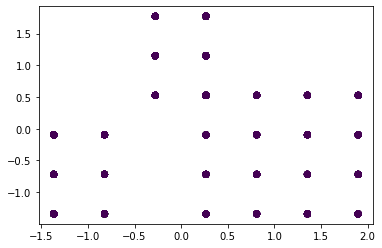

In [378]:
plt.scatter(mall_std.iloc[:, 0], mall_std.iloc[:, 1], c=dbscan.labels_)

In [379]:
dbscan_df.cluster.value_counts()

0    3040
Name: cluster, dtype: int64

One single cluster is created on taking eps=2 and min_samples=2.

Text(0, 0.5, 'Distance')

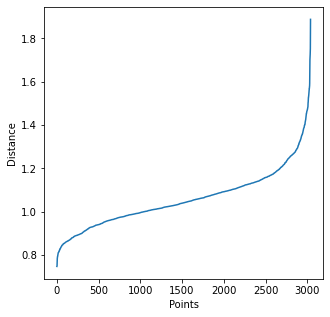

In [380]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(mall_std)

distances, indices = neighbors.kneighbors(mall_std)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.1940597154475212


<Figure size 360x360 with 0 Axes>

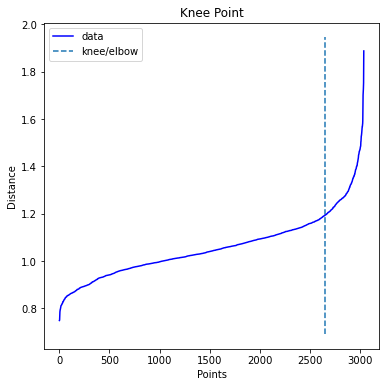

In [381]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

The plot gives the optimum eps value to be 1.1940597154475212.

In [382]:
#Creating clusters with the best eps and min_samples values.
dbscan = DBSCAN(eps=1.19405, min_samples=9)
clustering =  dbscan.fit(mall_std)
dbscan_labels=clustering.labels_

In [383]:
dbscan_df = pd.DataFrame({"ID": mall_data_id , "cluster":dbscan_labels})
dbscan_df.head(5)

,ID,cluster
0,1,0
1,2,1
2,3,0
3,4,2
4,5,1


In [384]:
dbscan_df.cluster.value_counts()

 2    1012
 0    1005
 1     984
-1      39
Name: cluster, dtype: int64

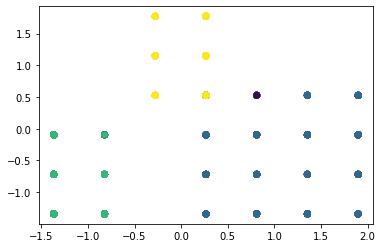

In [385]:
plt.scatter(mall_std.iloc[:, 0], mall_std.iloc[:, 1], c=dbscan.labels_)

The plot of DB Scan with 3 clusters and noise points.

In [386]:
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 3


In [387]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 39


DB Scan considers 39 points as noise points. Considering customers as noise could be not very beneficial for business.

### Analyzing Clusters (using KMeans)

In [388]:
ClusterLevelMean = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
ClusterLevelMean

,kmeans_cluster,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label
0,0,1.485178,2.993083,1.986166,3.568182,5.544466,2.986166,41907.792598,1.398221,1533.593874
1,1,5.577756,3.470472,5.506890,3.026575,2.007874,4.034449,60019.482421,2.981299,1515.354331
2,2,3.462451,6.000000,2.995059,5.980237,2.998024,5.091897,30991.546389,5.500988,1512.572134


In [389]:
final_cluster_data.groupby(['kmeans_cluster']).min().reset_index()

,kmeans_cluster,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label
0,0,1,2,1,2,4,2,470.051848,0,2
1,1,4,2,4,2,1,3,28929.676125,2,1
2,2,3,5,2,5,2,3,9589.885664,4,4


In [390]:
final_cluster_data.groupby(['kmeans_cluster']).max().reset_index()

,kmeans_cluster,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label
0,0,2,4,3,5,7,4,93091.459696,3,3038
1,1,7,5,7,4,3,5,94272.509094,4,3035
2,2,4,7,4,7,4,7,51463.268510,7,3040


In [391]:
ClusterLevelStdev = final_cluster_data.groupby(['kmeans_cluster']).std().reset_index()
ClusterLevelStdev

,kmeans_cluster,V1,V2,V3,V4,V5,V6,Income,Mall.Visits,label
0,0,0.500027,0.810997,0.813952,1.104928,1.096257,0.823617,16979.598675,1.118373,864.111206
1,1,1.120282,1.095047,1.107943,0.818675,0.816056,0.824379,11094.195956,0.812855,894.730870
2,2,0.498835,0.805520,0.813447,0.808954,0.811634,1.424129,5634.450341,1.098960,874.683970


### Labelling Clusters

#### Cluster 0: V2-V4 

In [392]:
#The people belonging to this cluster have an average income of ~31,000 units
# People in this cluster are the ones that visit the mall the most (maximum 7)

#### Cluster 1: V5

In [393]:
# The people belonging to this cluster have an average income of ~42,000 units
# People in this cluster are the ones that visit the mall the least (maximum 3)

#### Cluster 2: V1-V3

In [394]:
# Highest earners
# The people belonging to this cluster have an average income of ~60,000 units